**`PyTorch` has different inbuilt datasets for audio, video, text classification, recommendation system and so on**

In [1]:
import torch
import torch.nn as nn
import torch.cuda as cuda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
device = 'gpu' if cuda.is_available() else 'cpu'

In [3]:
print(f'PyTorch Version: {torch.__version__}')

PyTorch Version: 2.3.1+cu118


**Downloading `food_vision_mini` custom dataset. For this purpose we'll be using FoodVision_101 Dataset**

In [5]:
#Getting the pizza_steak_sushi.zip dataset from GitHub Repo
#The dataset has only 3 classes but 1000 images per class
#Start with a small dataset and if it works then increase the scale
import requests
import zipfile
from pathlib import Path
data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi'
if image_path.is_dir():
    print(f'Directory {image_path} already exists... Skipping download')
else:
    print(f'Creating directory {image_path}')
    image_path.mkdir(parents = True, exist_ok = True)
#Downloading the dataset
#Opening file path
with open(data_path / 'pizza_steak_sushi.zip', 'wb') as f:
    request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    print(f'Downloading {request.url}')
    f.write(request.content)
#Unzipping the dataset
with zipfile.ZipFile(data_path / 'pizza_steak_sushi.zip','r') as zip_ref:
    print(f'Unzipping {zip_ref.namelist()}')
    zip_ref.extractall(image_path)
    

Directory data/pizza_steak_sushi already exists... Skipping download
Unzipping ['test/', 'train/', 'test/pizza/', 'test/steak/', 'test/sushi/', 'test/steak/296375.jpg', 'test/steak/354513.jpg', 'test/steak/690177.jpg', 'test/steak/1882831.jpg', 'test/steak/894825.jpg', 'test/steak/3424937.jpg', 'test/steak/2117351.jpg', 'test/steak/2144308.jpg', 'test/steak/502076.jpg', 'test/steak/100274.jpg', 'test/steak/1285886.jpg', 'test/steak/1302563.jpg', 'test/steak/966174.jpg', 'test/steak/3873283.jpg', 'test/steak/27415.jpg', 'test/steak/1868005.jpg', 'test/steak/1627703.jpg', 'test/steak/673127.jpg', 'test/steak/1016217.jpg', 'test/sushi/479711.jpg', 'test/sushi/46797.jpg', 'test/sushi/2521706.jpg', 'test/sushi/2276986.jpg', 'test/sushi/2741434.jpg', 'test/sushi/2385731.jpg', 'test/sushi/2190404.jpg', 'test/sushi/1172255.jpg', 'test/sushi/207578.jpg', 'test/sushi/1245193.jpg', 'test/sushi/3196729.jpg', 'test/sushi/1680893.jpg', 'test/sushi/3806282.jpg', 'test/sushi/1742201.jpg', 'test/sushi/

**Preparing and viewing the dataset**

In [9]:
import os
def walkthrough_dir(path):
    for dirpath, dirnames, filename in os.walk(path):
        print(f'{len(dirnames)} directories in path : {dirpath} containing {filename}')

In [11]:
walkthrough_dir(image_path)

2 directories in path : data/pizza_steak_sushi containing []
3 directories in path : data/pizza_steak_sushi/test containing []
0 directories in path : data/pizza_steak_sushi/test/steak containing ['2144308.jpg', '1882831.jpg', '673127.jpg', '100274.jpg', '3873283.jpg', '1627703.jpg', '2117351.jpg', '1302563.jpg', '894825.jpg', '296375.jpg', '1285886.jpg', '502076.jpg', '690177.jpg', '966174.jpg', '1868005.jpg', '27415.jpg', '1016217.jpg', '354513.jpg', '3424937.jpg']
0 directories in path : data/pizza_steak_sushi/test/sushi containing ['3177743.jpg', '46797.jpg', '1680893.jpg', '887831.jpg', '175783.jpg', '1172255.jpg', '499605.jpg', '3196729.jpg', '684266.jpg', '2385731.jpg', '2521706.jpg', '1987407.jpg', '1434806.jpg', '207578.jpg', '988559.jpg', '2715127.jpg', '719108.jpg', '2190404.jpg', '1230335.jpg', '1600999.jpg', '1245193.jpg', '3806282.jpg', '3837522.jpg', '2276986.jpg', '1742201.jpg', '858157.jpg', '479711.jpg', '2540511.jpg', '2741434.jpg', '343036.jpg', '2394442.jpg']
0 dir

**Visualizing the images**

random image path: data/pizza_steak_sushi/test/pizza/2124579.jpg
image class: pizza
height: 384
width: 512


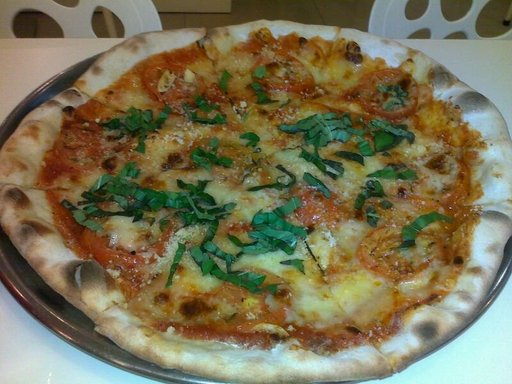

In [24]:
import random
from PIL import Image
random.seed(42)
#Get all of the image paths
#image_path has the path 'data/pizza_steak/sushi'
# * -> Train or Test/* -> pizza, steak or sushi/* -> name of the image file.jpg
img_path_list = list(image_path.glob('*/*/*.jpg'))
#Get a random path using random.choice
random_image_path = random.choice(img_path_list)
#Get the image class name using `pathlib.Path.parent.stem`
#random_image_path.parent gives /data/pizza_steak_sushi/set_name
#.stem gives the final subdirectory which is the class name
image_class = random_image_path.parent.stem
#Open the image using python's PIL library
img = Image.open(random_image_path)
print(f'random image path: {random_image_path}\nimage class: {image_class}\nheight: {img.height}\nwidth: {img.width}')
img

**Visualizing a random image with matplotlib**

In [41]:
from torchvision.transforms import ToTensor
def data_viz(img_path):
    main_path = img_path
    img_path_list = list(main_path.glob('*/*/*.jpg'))
    random_img_path = random.choice(img_path_list)
    img_class = random_img_path.parent.stem
    plt.figure(figsize = (10, 7))
    plt.imshow(Image.open(random_img_path))
    plt.title(f'Label:{img_class}    Height:{img.height}    Width:{img.width}')
    plt.axis(False)
    plt.tight_layout()

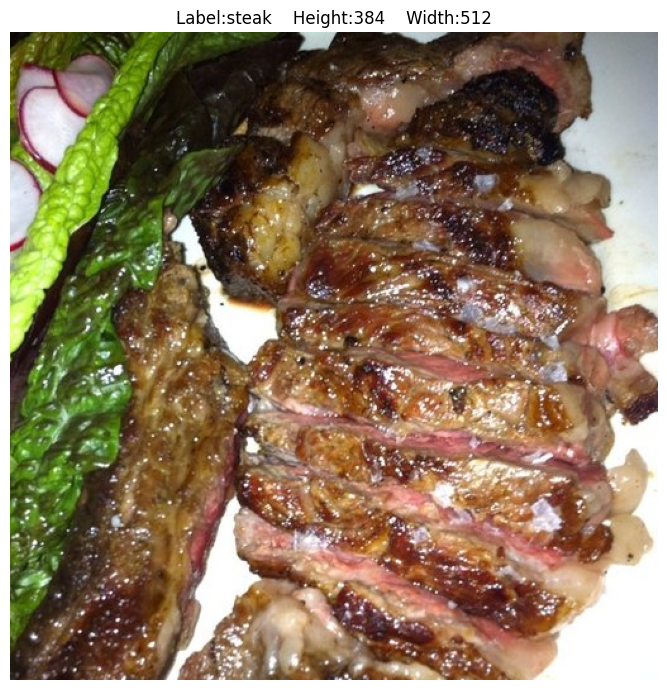

In [42]:
data_viz(image_path)

**Converting the images to `PyTorch` tensors**

In [43]:
train_dir = image_path / 'train'
test_dir = image_path / 'test'

**Initially the images have to be converted to tensors using `torch.utils.data.Dataset` then use `torch.utils.data.DataLoader`**

In [64]:
from torch.utils.data import DataLoader, Dataset

In [65]:
#Writing image transformation codes
from torchvision import transforms
data_transform = transforms.Compose([transforms.Resize(size = (64, 64)), # Changing the height and width of the image 
                                     transforms.RandomHorizontalFlip(p = 0.5), # Randomly performs horizontal flip on the images with a probability of 50% 
                                     transforms.ToTensor()])

In [66]:
data_transform(img).dtype

torch.float32

Text(0.5, 1.0, 'Transformed Image')

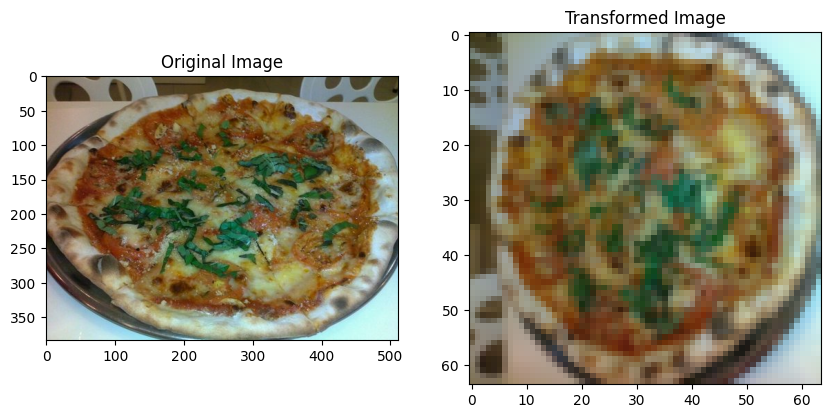

In [67]:
plt.figure(figsize = (10, 7))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(data_transform(img).T)
plt.title('Transformed Image')

**Note: The above plot shows the original and transformed image. .mT can be used for transpose while using .permute gives more freedom to resize the image however we want**

**Converting the train and test sets into Tensors using `ImageFolder`**


In [68]:
from torchvision import datasets
train_dataset = datasets.ImageFolder(root = train_dir, transform = data_transform, target_transform = None)
test_dataset = datasets.ImageFolder(root = test_dir, transform = data_transform, target_transform = None)
print(f'Train Data: {train_dataset}\nTest Data: {test_dataset}')

Train Data: Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test Data: Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [69]:
#Getting class names
classes = train_dataset.classes
classes

['pizza', 'steak', 'sushi']

In [70]:
#Getting class names with indices
class_dict = train_dataset.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [71]:
len(train_dataset), len(test_dataset)

(225, 75)

**Visualizing images from the train or test dataset**

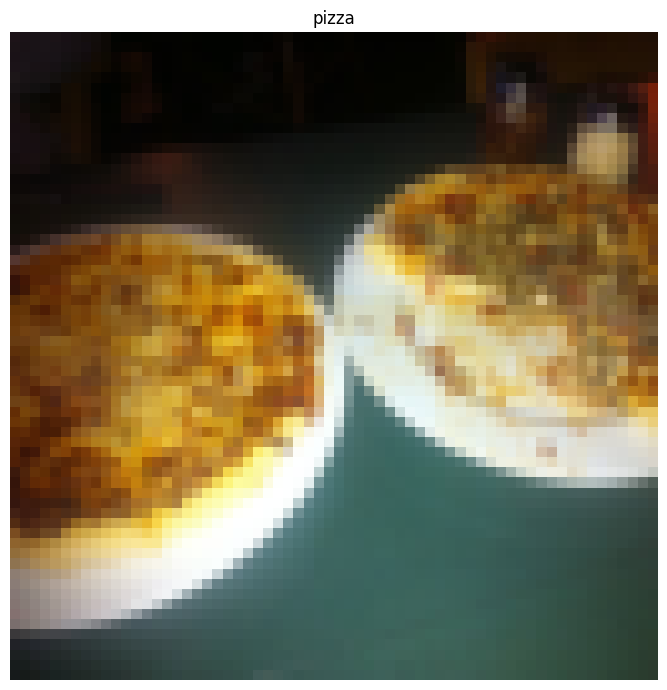

In [78]:
plt.figure(figsize = (10, 7))
plt.imshow(train_dataset[0][0].permute(1, 2, 0))
plt.title(classes[train_dataset[0][1]])
plt.axis('off')
plt.tight_layout()

**Converting the train and test datasets into train and test dataloaders**

In [84]:
train_dataloader = DataLoader(dataset = train_dataset, shuffle = True, batch_size = 32, num_workers = os.cpu_count())
test_dataloader = DataLoader(dataset = test_dataset, shuffle = False, batch_size = 32, num_workers = os.cpu_count())
#os.cpu_count() can be used for computing the no of processor cores to be working concurrently for preparing the dataloader

In [85]:
train_dataloader

In [86]:
test_dataloader

In [87]:
classes

['pizza', 'steak', 'sushi']

In [88]:
os.cpu_count()

24

**Writing a function or a class in place of the `torchvision.datasets.ImageFolder()`**

List of functionalities to be included in the function

1. Load images from the directories
2. Retrieving class names from the dataset
3. Retrieving classes as dictionary from the dataset

In [101]:
#Creating helper function that can get class names from a directory
def CustomImageFolder(path):
    img_class_list = os.listdir(path)
    img_class_dict = {}
    for i in range(len(img_class_list)):
        img_class_dict[img_class_list[i]] = i
    return img_class_list, img_class_dict

In [102]:
CustomImageFolder(train_dir)

(['steak', 'sushi', 'pizza'], {'steak': 0, 'sushi': 1, 'pizza': 2})

**Creating the function according to the course**

1. Retrieving class names using `os.scandir()` for directory traversal
2. Raise an error if class_names aren't found
3. Turn the class names into a list and a dict and return them 

In [103]:
#Setting up path for target directory
target_directory = train_dir
#Getting class names from target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

['pizza', 'steak', 'sushi']

In [105]:
def find_classes(directory: str) -> tuple[list[str], dict[str, int]]:
    class_names_list = sorted([entry.name for entry in list(os.scandir(directory))])
    if not class_names_list:
        raise FileNotFoundError(f"Couldn't find the class in {directory} Check the directory structure")
    #Creating a dict of index labels
    class_to_idx = {class_name: i for i, class_name in enumerate(class_names_list)}
    return class_names_list, class_to_idx

In [106]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

**Creating a custom `PyTorch` Dataset class**

Required functionalities:

1. Subclass `torch.utils.data.Dataset`
2. Init our subclass with a target directory
3. Create several attributes:
   * path: Path to our image 
   * Transform: transformation we want to perform
   * Classes: list of target classes
   * class_to_idx: a dict of target classes mapped to integer labels
4. Create a function to load images
5. Overwrite the `__len__()` method to get the length of the dataset
6. Overwrite the `__getitem__()` method to return a given sample when passed an index